<a href="https://colab.research.google.com/github/tomdaler/repository/blob/main/ML%20Projects/Techniques/GradientBosting_Bagging_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome",axis="columns")
y = df.Outcome

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

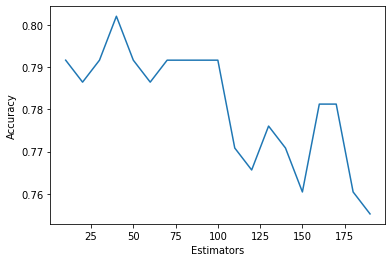

In [18]:
estimators = range(10, 200, 10)
total_accuracy = []

for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)
    total_accuracy.append(accuracy_score(y_test, boost_pred))

import matplotlib.pyplot as plt
plt.plot(estimators, total_accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()


WITH 40 ESTIMATORS WE HAVE THE HIGHET ACCURACY AND DECREASES AFTER

DECISION TREE

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.69480519, 0.65584416, 0.75974026, 0.80392157, 0.73856209])

In [27]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=40, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [28]:
bag_model.fit(X_train, y_train)
bag_model.oob_score_

bag_model.score(X_test, y_test)

0.796875

RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=5)
scores.mean()

0.7526695526695526

IF IT IS INCLUDED SMOTE, TO UNBALANCE, IT WILL INCREASE THE ACCURACY

In [24]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train2, y_train2 = smenn.fit_resample(X_train, y_train)

scores = cross_val_score(RandomForestClassifier(n_estimators=40), X_train2, y_train2, cv=5)
scores.mean()

0.9507979524239687